In [15]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from scipy.spatial import distance

class Member:
    def __init__(self, r_d, label=None, doc_id=None):
        self._r_d = r_d
        self._label = label
        self._doc_id = doc_id
        
class Cluster:
    def __init__(self):
        self._centroid = None
        self._members = []
    def reset_members(self):
        self._members = []
    def add_member(self, member):
        self._members.append(member)
    
class Kmeans:
    def __init__(self, num_clusters):
        self._num_clusters = num_clusters
        self._clusters = [Cluster() for _ in range(self._num_clusters)]
        self._E = []
        self._S = 0
        
    def load_data(self, data_path):
        def sparse_to_dense(sparse_r_d, vocab_size):
            r_d = [0.0 for _ in range(vocab_size)]
            indices_tfidfs = sparse_r_d.split()
            for index_tfidf in indices_tfidfs:
                index = int(index_tfidf.split(':')[0])
                tfidf = float(index_tfidf.split(':')[1])
                r_d[index] = tfidf
            return np.array(r_d)
        
        with open(data_path) as f:
            d_lines = f.read().splitlines()
        with open('./datasets/20news-bydate/words_idfs.txt') as f:
            vocab_size = len(f.read().splitlines())
            
        self._data = []
        self._label_count = defaultdict(int)
        for data_id, d in enumerate(d_lines):
            features = d.split('<fff>')
            label, doc_id = int(features[0]), int(features[1])
            self._label_count[label] += 1
            r_d = sparse_to_dense(sparse_r_d=features[2], vocab_size=vocab_size)
            
            self._data.append(Member(r_d=r_d, label=label, doc_id=doc_id))
        
    def random_init(self, seed_value):
        np.random.seed(seed_value)
        for cluster in self._clusters:
            cluster._centroid = np.array(np.random.choice(self._data)._r_d)
        
    def compute_similarity(self, member, centroid):
        return 1 / (distance.euclidean(member._r_d, centroid) + 0.000001)
#         return distance.euclidean(member._r_d, centroid)
        
    def select_cluster_for(self, member):
        best_fit_cluster = None
        max_similarity = -1
        for cluster in self._clusters:
            similarity = self.compute_similarity(member, cluster._centroid)
            if similarity > max_similarity:
                best_fit_cluster = cluster
                max_similarity = similarity
                
        best_fit_cluster.add_member(member)
        return max_similarity
    
    def update_centroid_of(self, cluster):
        member_r_ds = [member._r_d for member in cluster._members]
        aver_r_d = np.mean(member_r_ds, axis=0)
        sqrt_sum_sqr = np.sqrt(np.sum(aver_r_d ** 2))
        new_centroid = np.array([value / sqrt_sum_sqr for value in aver_r_d])
        
        cluster._centroid = new_centroid
        
    def stopping_condition(self, criterion, threshold):
        criteria = ['centroid', 'similarity', 'max_iters']
        assert criterion in criteria
        if criterion == 'max_iters':
            if self._iteration >= threshold:
                return True
            else:
                return False
            
        elif criterion == 'centroid':
            E_new = [list(cluster._centroid) for cluster in self._clusters]
            E_new_minus_E = [centroid for centroid in E_new if centroid not in self._E]
            self._E = E_new
            if len(E_new_minus_E) <= threshold:
                return True
            else:
                return False
            
        else:
            new_S_minus_S = self._new_S - self._S
            self._S = self._new_S
            if new_S_minus_S <= threshold:
                return True
            else:
                return False
        
    def run(self, seed_value, criterion, threshold):
        self.random_init(seed_value)
        
        self._iteration = 0
        while True:
            for cluster in self._clusters:
                cluster.reset_members()
            self._new_S = 0
            for member in self._data:
                max_s = self.select_cluster_for(member)
                self._new_S += max_s
            for cluster in self._clusters:
                self.update_centroid_of(cluster)
                
            self._iteration += 1
            if self.stopping_condition(criterion, threshold):
                break
        
    def compute_purity(self):
        majority_sum = 0
        for cluster in self._clusters:
            member_labels = [member._label for member in cluster._members]
            max_count = max([member_labels.count(label) for label in range(20)])
            majority_sum += max_count
        return majority_sum * 1. / len(self._data)
        
    def compute_NMI(self):
        I_value, H_omega, H_C, N = 0., 0., 0., len(self._data)
        for cluster in self._clusters:
            wk = len(cluster._members) * 1.
            H_omega += -wk / N * np.log10(wk / N)
            member_labels = [member._label for member in cluster._members]
            for label in range(20):
                wk_cj = member_labels.count(label) * 1.
                cj = self._label_count[label]
                I_value += wk_cj / N * np.log10(N * wk_cj / (wk * cj) + 1e-12)
        for label in range(20):
            cj = self._label_count[label] * 1.
            H_C += - cj / N * np.log10(cj / N)
        return I_value * 2. / (H_omega + H_C)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30


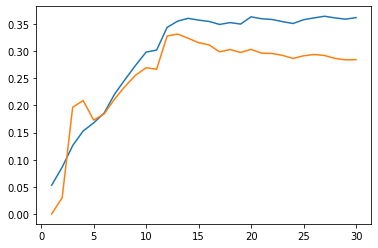

In [24]:
import matplotlib.pyplot as plt

purity_list = list()
nmi_list = list()
k_list = list()

def clustering_with_diy_KMeans(purity_list, nmi_list, k_list):
#     kmeans = Kmeans(20)

#     kmeans.load_data(data_path='./datasets/20news-bydate/20news-full-tfidf.txt')
#     # kmeans.run(seed_value=2018, criterion='max_iters', threshold=4)
#     # kmeans.run(seed_value=2018, criterion='centroid', threshold=1000)
#     kmeans.run(seed_value=2018, criterion='similarity', threshold=1000)

#     purity = kmeans.compute_purity()
#     NMI = kmeans.compute_NMI()

#     print('purity: ', purity)
#     print('NMI: ', NMI)
#     purity_list = list()
#     nmi_list = list()
#     k_list = list()
    for k in range(1, 31):
        kmeans = Kmeans(k)
        print("k: ", k)

        kmeans.load_data(data_path='./datasets/20news-bydate/20news-full-tfidf.txt')
        # kmeans.run(seed_value=2018, criterion='max_iters', threshold=4)
        # kmeans.run(seed_value=2018, criterion='centroid', threshold=1000)
        kmeans.run(seed_value=2018, criterion='similarity', threshold=1000)

        purity = kmeans.compute_purity()
        NMI = kmeans.compute_NMI()
        
        purity_list.append(purity)
        nmi_list.append(NMI)
        k_list.append(k)

#         print('k: {}, purity: '.format(purity)
#         print('NMI: ', NMI)
    
clustering_with_diy_KMeans(purity_list, nmi_list, k_list)
plt.plot(k_list, purity_list)
plt.plot(k_list, nmi_list)

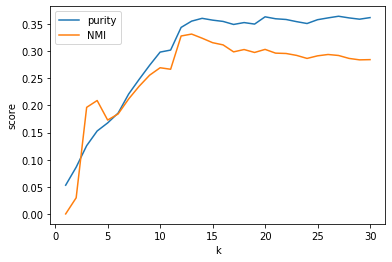

In [27]:
plt.xlabel("k")
plt.ylabel("score")
plt.plot(k_list, purity_list, label='purity')
plt.plot(k_list, nmi_list, label='NMI')
plt.legend()

In [33]:
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

def load_data(data_path):
    def sparse_to_dense(sparse_r_d, vocab_size):
        r_d = [0.0 for _ in range(vocab_size)]
        indices_tfidfs = sparse_r_d.split()
        for index_tfidf in indices_tfidfs:
            index = int(index_tfidf.split(':')[0])
            tfidf = float(index_tfidf.split(':')[1])
            r_d[index] = tfidf
        return np.array(r_d)

    with open(data_path) as f:
        d_lines = f.read().splitlines()
    with open('./datasets/20news-bydate/words_idfs.txt') as f:
        vocab_size = len(f.read().splitlines())

    data = []
    label_count = defaultdict(int)
    for data_id, d in enumerate(d_lines):
        features = d.split('<fff>')
        label, doc_id = int(features[0]), int(features[1])
        label_count[label] += 1
        r_d = sparse_to_dense(sparse_r_d=features[2], vocab_size=vocab_size)

        data.append(Member(r_d=r_d, label=label, doc_id=doc_id))
    return data, label_count
    

def clustering_with_KMeans():
    data, labels = load_data(data_path='./datasets/20news-bydate/20news-full-tfidf.txt')
    
    X = csr_matrix(data)
    print('=========')
    kmeans = Kmeans(
        n_clusters = 20,
        init = 'random', 
        n_init = 5,
        tol = 1e-3,
        random_state=2018
    ).fit(X)
    labels = kmeans.labels_
    
# clustering_with_KMeans()

In [2]:
from sklearn.svm import LinearSVC

def classifying_with_linear_SVMs():
    train_X, train_y = load_data(data_path='./datasets/20news-bydate/20news-train-tfidf.txt')
    classifier = LinearSVC(
        C=10.0,
        tol=0.001,
        verbose=True
    )
    classifier.fit(train_X, train_y)

    test_X, test_y = load_data(data_path='./datasets/20news-bydate/20news-test-tfidf.txt')
    predicted_y = classifier.predict(test_X)
    accuracy = compute_accuracy(predicted_y = predicted_y, expected_y = test_y)
    print('Accuracy: ', accuracy)
    
def compute_accuracy(predicted_y, expected_y):
    matches = np.equal(predicted_y, expected_y)
    accuracy = np.sum(matches.astype(float)) / expected_y.size
    return accuracy

